In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [4]:
import networkit as nk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import random

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances
from IPython.display import display, Math, Latex, Markdown
from tqdm.notebook import tqdm

from cluster_filter import cfilter, cassign

from External.ICT.calculate_ICT import calculate_ICT, calculate_sub_ICTs
from External.clustering import centers, k_means_pp
from External.generation import create_graph
from External.plotting import plot_points, plot_graph, no_intersections
from External.create_k_nearest import patch_together

plt.style.use('standard.mplstyle')

cv2 package not present. No movies possible


In [5]:
# Hyperparameters
mode = "K_Nearest"
metric = "euclidean"
dataset = "non_convex"
ICT_algorithm = "cluster_all"


min_cluster_size = 12
small_behavior = "reassign"

# image loading
n = number_of_nodes = 1000
Random = True
image_name = "image"

# for the filename
parameters = "2-0_5-1000"

In [6]:
def load_image(filename):
    a=plt.imread(filename+'.png')
    rgb_weights = [0.2989, 0.5870, 0.1140]
    
    grayscale_image = np.dot(a[...,:3], rgb_weights)>0
    
    return grayscale_image
    
    
def sample_points_from_image(n,img,Random=True):
    if not Random:
        random.seed(42)
    non_zero = np.where(img!=0)
    # non_zero=np.vstack((non_zero[0],non_zero[1])).T
    
    
    idx = random.sample(range(len(non_zero[0])),n)
    
    x_coord = non_zero[0][idx]
    y_coord = non_zero[1][idx]
    return x_coord,y_coord

In [7]:
# Compute the position array
img = load_image(image_name)
position = np.array(sample_points_from_image(n,img,Random)).T
position = StandardScaler().fit_transform(position)

# Compute knearest graph


# ε, δ = 0.03, 0.1
# r = 1 / (ε**2) * (int(np.log2(number_of_nodes - 1)) + 1 + np.log(1/δ))
# k = int(np.sqrt(r))
# k = np.min((k, number_of_nodes))


k = 100

cluster_centers, cluster_labels = k_means_pp(k, position, return_labels=True)

if small_behavior == "remove":
    cluster_centers, cluster_labels, (position, ) = cfilter(cluster_centers, cluster_labels, t=min_cluster_size, position_likes=[position])
    number_of_nodes = len(position)
if small_behavior == "reassign":
    cluster_centers, cluster_labels = cassign(cluster_centers, cluster_labels, position, t=min_cluster_size)
    
sub_ICTs, components = calculate_sub_ICTs(position, cluster_centers, cluster_labels, t=min_cluster_size)


# plot the ICT forest
ICT_forest = nk.graph.Graph(n=len(position), weighted=True)
distances = pairwise_distances(position, position)
for component, sub_ICT in zip(components, sub_ICTs):
    for u, v, w in sub_ICT.iterEdgesWeights():
        nodeA = component[u]
        nodeB = component[v]
        ICT_forest.addEdge(nodeA, nodeB, distances[nodeA, nodeB])
        
ICT_forest.indexEdges()

sklearn is done: 0.7762038707733154
My own part is done: 0.0060291290283203125


  0%|          | 0/52 [00:00<?, ?it/s]

Final k: 11


create edgeId array:   0%|          | 0/95 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/95 [00:00<?, ?it/s]

Iteration over all nodes:   0%|          | 0/14 [00:00<?, ?it/s]

update Arr 95 -> 75
update Arr 75 -> 68
update Arr 68 -> 54
update Arr 54 -> 44
update Arr 44 -> 37
update Arr 37 -> 29
update Arr 29 -> 23
update Arr 23 -> 19
update Arr 19 -> 17
update Arr 17 -> 15
update Arr 15 -> 14
Final k: 11


create edgeId array:   0%|          | 0/185 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/185 [00:00<?, ?it/s]

Iteration over all nodes:   0%|          | 0/26 [00:00<?, ?it/s]

update Arr 185 -> 162
update Arr 162 -> 137
update Arr 137 -> 124
update Arr 124 -> 109
update Arr 109 -> 93
update Arr 93 -> 83
update Arr 83 -> 73
update Arr 73 -> 60
update Arr 60 -> 52
update Arr 52 -> 39
update Arr 39 -> 36
update Arr 36 -> 36
update Arr 36 -> 32
update Arr 32 -> 29
update Arr 29 -> 27
update Arr 27 -> 26
Final k: 11


create edgeId array:   0%|          | 0/76 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/76 [00:00<?, ?it/s]

Iteration over all nodes:   0%|          | 0/12 [00:00<?, ?it/s]

update Arr 76 -> 51
update Arr 51 -> 36
update Arr 36 -> 30
update Arr 30 -> 25
update Arr 25 -> 22
update Arr 22 -> 20
update Arr 20 -> 18
update Arr 18 -> 15
update Arr 15 -> 13
update Arr 13 -> 12
Final k: 11


create edgeId array:   0%|          | 0/136 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/136 [00:00<?, ?it/s]

Iteration over all nodes:   0%|          | 0/19 [00:00<?, ?it/s]

update Arr 136 -> 117
update Arr 117 -> 97
update Arr 97 -> 80
update Arr 80 -> 65
update Arr 65 -> 55
update Arr 55 -> 47
update Arr 47 -> 41
update Arr 41 -> 34
update Arr 34 -> 28
update Arr 28 -> 23
update Arr 23 -> 20
update Arr 20 -> 20
update Arr 20 -> 19
Final k: 11


create edgeId array:   0%|          | 0/118 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/118 [00:00<?, ?it/s]

Iteration over all nodes:   0%|          | 0/17 [00:00<?, ?it/s]

update Arr 118 -> 86
update Arr 86 -> 78
update Arr 78 -> 65
update Arr 65 -> 52
update Arr 52 -> 39
update Arr 39 -> 33
update Arr 33 -> 28
update Arr 28 -> 25
update Arr 25 -> 19
update Arr 19 -> 18
update Arr 18 -> 18
update Arr 18 -> 18
Final k: 11


create edgeId array:   0%|          | 0/113 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/113 [00:00<?, ?it/s]

Iteration over all nodes:   0%|          | 0/16 [00:00<?, ?it/s]

update Arr 113 -> 95
update Arr 95 -> 69
update Arr 69 -> 53
update Arr 53 -> 47
update Arr 47 -> 38
update Arr 38 -> 31
update Arr 31 -> 25
update Arr 25 -> 21
update Arr 21 -> 20
update Arr 20 -> 19
update Arr 19 -> 17
update Arr 17 -> 16
Final k: 11


create edgeId array:   0%|          | 0/96 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/96 [00:00<?, ?it/s]

Iteration over all nodes:   0%|          | 0/14 [00:00<?, ?it/s]

update Arr 96 -> 68
update Arr 68 -> 53
update Arr 53 -> 47
update Arr 47 -> 37
update Arr 37 -> 27
update Arr 27 -> 24
update Arr 24 -> 19
update Arr 19 -> 17
update Arr 17 -> 15
update Arr 15 -> 14
Final k: 11


create edgeId array:   0%|          | 0/121 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/121 [00:00<?, ?it/s]

Iteration over all nodes:   0%|          | 0/17 [00:00<?, ?it/s]

update Arr 121 -> 89
update Arr 89 -> 80
update Arr 80 -> 65
update Arr 65 -> 53
update Arr 53 -> 34
update Arr 34 -> 30
update Arr 30 -> 27
update Arr 27 -> 25
update Arr 25 -> 24
update Arr 24 -> 24
update Arr 24 -> 20
update Arr 20 -> 19
update Arr 19 -> 18
Final k: 11


create edgeId array:   0%|          | 0/170 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/170 [00:00<?, ?it/s]

Iteration over all nodes:   0%|          | 0/23 [00:00<?, ?it/s]

update Arr 170 -> 140
update Arr 140 -> 119
update Arr 119 -> 94
update Arr 94 -> 79
update Arr 79 -> 71
update Arr 71 -> 63
update Arr 63 -> 53
update Arr 53 -> 47
update Arr 47 -> 37
update Arr 37 -> 32
update Arr 32 -> 29
update Arr 29 -> 26
update Arr 26 -> 24
update Arr 24 -> 23
Final k: 11


create edgeId array:   0%|          | 0/122 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/122 [00:00<?, ?it/s]

Iteration over all nodes:   0%|          | 0/17 [00:00<?, ?it/s]

update Arr 122 -> 82
update Arr 82 -> 68
update Arr 68 -> 60
update Arr 60 -> 48
update Arr 48 -> 38
update Arr 38 -> 32
update Arr 32 -> 25
update Arr 25 -> 23
update Arr 23 -> 20
update Arr 20 -> 18
update Arr 18 -> 17
Final k: 11


create edgeId array:   0%|          | 0/96 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/96 [00:00<?, ?it/s]

Iteration over all nodes:   0%|          | 0/14 [00:00<?, ?it/s]

update Arr 96 -> 74
update Arr 74 -> 48
update Arr 48 -> 43
update Arr 43 -> 35
update Arr 35 -> 29
update Arr 29 -> 23
update Arr 23 -> 20
update Arr 20 -> 17
update Arr 17 -> 15
update Arr 15 -> 14
Final k: 11


create edgeId array:   0%|          | 0/127 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/127 [00:00<?, ?it/s]

Iteration over all nodes:   0%|          | 0/18 [00:00<?, ?it/s]

update Arr 127 -> 110
update Arr 110 -> 95
update Arr 95 -> 84
update Arr 84 -> 72
update Arr 72 -> 57
update Arr 57 -> 51
update Arr 51 -> 45
update Arr 45 -> 40
update Arr 40 -> 32
update Arr 32 -> 28
update Arr 28 -> 24
update Arr 24 -> 20
update Arr 20 -> 18
Final k: 11


create edgeId array:   0%|          | 0/145 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/145 [00:00<?, ?it/s]

Iteration over all nodes:   0%|          | 0/20 [00:00<?, ?it/s]

update Arr 145 -> 128
update Arr 128 -> 107
update Arr 107 -> 91
update Arr 91 -> 75
update Arr 75 -> 64
update Arr 64 -> 54
update Arr 54 -> 47
update Arr 47 -> 40
update Arr 40 -> 32
update Arr 32 -> 30
update Arr 30 -> 26
update Arr 26 -> 23
update Arr 23 -> 21
update Arr 21 -> 20
Final k: 11


create edgeId array:   0%|          | 0/86 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/86 [00:00<?, ?it/s]

Iteration over all nodes:   0%|          | 0/13 [00:00<?, ?it/s]

update Arr 86 -> 69
update Arr 69 -> 54
update Arr 54 -> 44
update Arr 44 -> 36
update Arr 36 -> 32
update Arr 32 -> 28
update Arr 28 -> 21
update Arr 21 -> 16
update Arr 16 -> 16
update Arr 16 -> 14
update Arr 14 -> 14
Final k: 11


create edgeId array:   0%|          | 0/121 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/121 [00:00<?, ?it/s]

Iteration over all nodes:   0%|          | 0/17 [00:00<?, ?it/s]

update Arr 121 -> 94
update Arr 94 -> 71
update Arr 71 -> 63
update Arr 63 -> 51
update Arr 51 -> 45
update Arr 45 -> 38
update Arr 38 -> 32
update Arr 32 -> 27
update Arr 27 -> 23
update Arr 23 -> 20
update Arr 20 -> 18
update Arr 18 -> 17
Final k: 11


create edgeId array:   0%|          | 0/119 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/119 [00:00<?, ?it/s]

Iteration over all nodes:   0%|          | 0/17 [00:00<?, ?it/s]

update Arr 119 -> 92
update Arr 92 -> 75
update Arr 75 -> 57
update Arr 57 -> 47
update Arr 47 -> 38
update Arr 38 -> 29
update Arr 29 -> 26
update Arr 26 -> 23
update Arr 23 -> 20
update Arr 20 -> 18
update Arr 18 -> 17
Final k: 11


create edgeId array:   0%|          | 0/141 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/141 [00:00<?, ?it/s]

Iteration over all nodes:   0%|          | 0/20 [00:00<?, ?it/s]

update Arr 141 -> 113
update Arr 113 -> 97
update Arr 97 -> 88
update Arr 88 -> 61
update Arr 61 -> 51
update Arr 51 -> 46
update Arr 46 -> 38
update Arr 38 -> 30
update Arr 30 -> 26
update Arr 26 -> 23
update Arr 23 -> 21
update Arr 21 -> 20
Final k: 11


create edgeId array:   0%|          | 0/170 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/170 [00:00<?, ?it/s]

Iteration over all nodes:   0%|          | 0/24 [00:00<?, ?it/s]

update Arr 170 -> 152
update Arr 152 -> 135
update Arr 135 -> 115
update Arr 115 -> 104
update Arr 104 -> 79
update Arr 79 -> 71
update Arr 71 -> 59
update Arr 59 -> 50
update Arr 50 -> 45
update Arr 45 -> 39
update Arr 39 -> 29
update Arr 29 -> 27
update Arr 27 -> 27
update Arr 27 -> 25
update Arr 25 -> 24
Final k: 11


create edgeId array:   0%|          | 0/106 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/106 [00:00<?, ?it/s]

Iteration over all nodes:   0%|          | 0/15 [00:00<?, ?it/s]

update Arr 106 -> 90
update Arr 90 -> 78
update Arr 78 -> 70
update Arr 70 -> 60
update Arr 60 -> 51
update Arr 51 -> 42
update Arr 42 -> 34
update Arr 34 -> 29
update Arr 29 -> 25
update Arr 25 -> 21
update Arr 21 -> 18
update Arr 18 -> 16
update Arr 16 -> 15
Final k: 11


create edgeId array:   0%|          | 0/238 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/238 [00:00<?, ?it/s]

Iteration over all nodes:   0%|          | 0/33 [00:00<?, ?it/s]

update Arr 238 -> 215
update Arr 215 -> 190
update Arr 190 -> 167
update Arr 167 -> 149
update Arr 149 -> 132
update Arr 132 -> 117
update Arr 117 -> 106
update Arr 106 -> 92
update Arr 92 -> 78
update Arr 78 -> 63
update Arr 63 -> 57
update Arr 57 -> 48
update Arr 48 -> 43
update Arr 43 -> 39
update Arr 39 -> 36
update Arr 36 -> 34
update Arr 34 -> 33
Final k: 11


create edgeId array:   0%|          | 0/96 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/96 [00:00<?, ?it/s]

Iteration over all nodes:   0%|          | 0/14 [00:00<?, ?it/s]

update Arr 96 -> 71
update Arr 71 -> 60
update Arr 60 -> 52
update Arr 52 -> 41
update Arr 41 -> 29
update Arr 29 -> 24
update Arr 24 -> 19
update Arr 19 -> 17
update Arr 17 -> 15
update Arr 15 -> 14
Final k: 11


create edgeId array:   0%|          | 0/189 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/189 [00:00<?, ?it/s]

Iteration over all nodes:   0%|          | 0/26 [00:00<?, ?it/s]

update Arr 189 -> 171
update Arr 171 -> 146
update Arr 146 -> 131
update Arr 131 -> 117
update Arr 117 -> 106
update Arr 106 -> 96
update Arr 96 -> 71
update Arr 71 -> 64
update Arr 64 -> 57
update Arr 57 -> 46
update Arr 46 -> 39
update Arr 39 -> 33
update Arr 33 -> 32
update Arr 32 -> 29
update Arr 29 -> 27
update Arr 27 -> 26
Final k: 11


create edgeId array:   0%|          | 0/122 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/122 [00:00<?, ?it/s]

Iteration over all nodes:   0%|          | 0/17 [00:00<?, ?it/s]

update Arr 122 -> 110
update Arr 110 -> 93
update Arr 93 -> 80
update Arr 80 -> 68
update Arr 68 -> 60
update Arr 60 -> 45
update Arr 45 -> 34
update Arr 34 -> 28
update Arr 28 -> 26
update Arr 26 -> 23
update Arr 23 -> 19
update Arr 19 -> 18
update Arr 18 -> 17
Final k: 11


create edgeId array:   0%|          | 0/246 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/246 [00:00<?, ?it/s]

Iteration over all nodes:   0%|          | 0/35 [00:00<?, ?it/s]

update Arr 246 -> 207
update Arr 207 -> 185
update Arr 185 -> 168
update Arr 168 -> 151
update Arr 151 -> 131
update Arr 131 -> 117
update Arr 117 -> 104
update Arr 104 -> 94
update Arr 94 -> 79
update Arr 79 -> 69
update Arr 69 -> 61
update Arr 61 -> 53
update Arr 53 -> 48
update Arr 48 -> 41
update Arr 41 -> 39
update Arr 39 -> 38
update Arr 38 -> 36
update Arr 36 -> 35
Final k: 11


create edgeId array:   0%|          | 0/119 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/119 [00:00<?, ?it/s]

Iteration over all nodes:   0%|          | 0/17 [00:00<?, ?it/s]

update Arr 119 -> 84
update Arr 84 -> 63
update Arr 63 -> 53
update Arr 53 -> 43
update Arr 43 -> 35
update Arr 35 -> 26
update Arr 26 -> 22
update Arr 22 -> 20
update Arr 20 -> 18
update Arr 18 -> 17
Final k: 11


create edgeId array:   0%|          | 0/166 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/166 [00:00<?, ?it/s]

Iteration over all nodes:   0%|          | 0/24 [00:00<?, ?it/s]

update Arr 166 -> 147
update Arr 147 -> 126
update Arr 126 -> 114
update Arr 114 -> 99
update Arr 99 -> 89
update Arr 89 -> 75
update Arr 75 -> 61
update Arr 61 -> 52
update Arr 52 -> 47
update Arr 47 -> 38
update Arr 38 -> 30
update Arr 30 -> 30
update Arr 30 -> 27
update Arr 27 -> 25
update Arr 25 -> 24
Final k: 11


create edgeId array:   0%|          | 0/114 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/114 [00:00<?, ?it/s]

Iteration over all nodes:   0%|          | 0/16 [00:00<?, ?it/s]

update Arr 114 -> 99
update Arr 99 -> 89
update Arr 89 -> 63
update Arr 63 -> 56
update Arr 56 -> 43
update Arr 43 -> 32
update Arr 32 -> 24
update Arr 24 -> 22
update Arr 22 -> 19
update Arr 19 -> 17
update Arr 17 -> 16
Final k: 11


create edgeId array:   0%|          | 0/87 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/87 [00:00<?, ?it/s]

Iteration over all nodes:   0%|          | 0/13 [00:00<?, ?it/s]

update Arr 87 -> 69
update Arr 69 -> 58
update Arr 58 -> 49
update Arr 49 -> 40
update Arr 40 -> 34
update Arr 34 -> 28
update Arr 28 -> 21
update Arr 21 -> 19
update Arr 19 -> 16
update Arr 16 -> 14
update Arr 14 -> 13
Final k: 11


create edgeId array:   0%|          | 0/150 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/150 [00:00<?, ?it/s]

Iteration over all nodes:   0%|          | 0/21 [00:00<?, ?it/s]

update Arr 150 -> 125
update Arr 125 -> 106
update Arr 106 -> 88
update Arr 88 -> 77
update Arr 77 -> 63
update Arr 63 -> 54
update Arr 54 -> 48
update Arr 48 -> 40
update Arr 40 -> 32
update Arr 32 -> 30
update Arr 30 -> 27
update Arr 27 -> 24
update Arr 24 -> 22
update Arr 22 -> 21
Final k: 11


create edgeId array:   0%|          | 0/113 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/113 [00:00<?, ?it/s]

Iteration over all nodes:   0%|          | 0/16 [00:00<?, ?it/s]

update Arr 113 -> 97
update Arr 97 -> 81
update Arr 81 -> 64
update Arr 64 -> 54
update Arr 54 -> 40
update Arr 40 -> 30
update Arr 30 -> 26
update Arr 26 -> 22
update Arr 22 -> 19
update Arr 19 -> 17
update Arr 17 -> 16
Final k: 11


create edgeId array:   0%|          | 0/86 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/86 [00:00<?, ?it/s]

Iteration over all nodes:   0%|          | 0/13 [00:00<?, ?it/s]

update Arr 86 -> 67
update Arr 67 -> 58
update Arr 58 -> 48
update Arr 48 -> 36
update Arr 36 -> 27
update Arr 27 -> 23
update Arr 23 -> 19
update Arr 19 -> 16
update Arr 16 -> 13
Final k: 11


create edgeId array:   0%|          | 0/141 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/141 [00:00<?, ?it/s]

Iteration over all nodes:   0%|          | 0/20 [00:00<?, ?it/s]

update Arr 141 -> 127
update Arr 127 -> 108
update Arr 108 -> 97
update Arr 97 -> 78
update Arr 78 -> 69
update Arr 69 -> 54
update Arr 54 -> 48
update Arr 48 -> 41
update Arr 41 -> 35
update Arr 35 -> 30
update Arr 30 -> 26
update Arr 26 -> 23
update Arr 23 -> 21
update Arr 21 -> 20
Final k: 11


create edgeId array:   0%|          | 0/97 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/97 [00:00<?, ?it/s]

Iteration over all nodes:   0%|          | 0/14 [00:00<?, ?it/s]

update Arr 97 -> 72
update Arr 72 -> 56
update Arr 56 -> 48
update Arr 48 -> 40
update Arr 40 -> 28
update Arr 28 -> 23
update Arr 23 -> 23
update Arr 23 -> 20
update Arr 20 -> 17
update Arr 17 -> 15
update Arr 15 -> 14
Final k: 11


create edgeId array:   0%|          | 0/96 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/96 [00:00<?, ?it/s]

Iteration over all nodes:   0%|          | 0/14 [00:00<?, ?it/s]

update Arr 96 -> 79
update Arr 79 -> 63
update Arr 63 -> 57
update Arr 57 -> 50
update Arr 50 -> 42
update Arr 42 -> 35
update Arr 35 -> 29
update Arr 29 -> 24
update Arr 24 -> 20
update Arr 20 -> 17
update Arr 17 -> 15
update Arr 15 -> 14
Final k: 11


create edgeId array:   0%|          | 0/129 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/129 [00:00<?, ?it/s]

Iteration over all nodes:   0%|          | 0/18 [00:00<?, ?it/s]

update Arr 129 -> 115
update Arr 115 -> 90
update Arr 90 -> 76
update Arr 76 -> 59
update Arr 59 -> 40
update Arr 40 -> 32
update Arr 32 -> 28
update Arr 28 -> 24
update Arr 24 -> 21
update Arr 21 -> 19
update Arr 19 -> 18
Final k: 11


create edgeId array:   0%|          | 0/77 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/77 [00:00<?, ?it/s]

Iteration over all nodes:   0%|          | 0/12 [00:00<?, ?it/s]

update Arr 77 -> 57
update Arr 57 -> 48
update Arr 48 -> 40
update Arr 40 -> 32
update Arr 32 -> 27
update Arr 27 -> 22
update Arr 22 -> 15
update Arr 15 -> 15
update Arr 15 -> 13
update Arr 13 -> 12
Final k: 11


create edgeId array:   0%|          | 0/96 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/96 [00:00<?, ?it/s]

Iteration over all nodes:   0%|          | 0/14 [00:00<?, ?it/s]

update Arr 96 -> 66
update Arr 66 -> 59
update Arr 59 -> 49
update Arr 49 -> 42
update Arr 42 -> 35
update Arr 35 -> 26
update Arr 26 -> 23
update Arr 23 -> 20
update Arr 20 -> 17
update Arr 17 -> 15
update Arr 15 -> 14
Final k: 11


create edgeId array:   0%|          | 0/95 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/95 [00:00<?, ?it/s]

Iteration over all nodes:   0%|          | 0/14 [00:00<?, ?it/s]

update Arr 95 -> 78
update Arr 78 -> 66
update Arr 66 -> 54
update Arr 54 -> 42
update Arr 42 -> 35
update Arr 35 -> 26
update Arr 26 -> 24
update Arr 24 -> 20
update Arr 20 -> 17
update Arr 17 -> 15
update Arr 15 -> 14
Final k: 11


create edgeId array:   0%|          | 0/119 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/119 [00:00<?, ?it/s]

Iteration over all nodes:   0%|          | 0/17 [00:00<?, ?it/s]

update Arr 119 -> 90
update Arr 90 -> 68
update Arr 68 -> 61
update Arr 61 -> 52
update Arr 52 -> 38
update Arr 38 -> 34
update Arr 34 -> 27
update Arr 27 -> 23
update Arr 23 -> 20
update Arr 20 -> 18
update Arr 18 -> 17
Final k: 11


create edgeId array:   0%|          | 0/147 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/147 [00:00<?, ?it/s]

Iteration over all nodes:   0%|          | 0/21 [00:00<?, ?it/s]

update Arr 147 -> 132
update Arr 132 -> 105
update Arr 105 -> 92
update Arr 92 -> 82
update Arr 82 -> 71
update Arr 71 -> 63
update Arr 63 -> 53
update Arr 53 -> 47
update Arr 47 -> 41
update Arr 41 -> 37
update Arr 37 -> 31
update Arr 31 -> 27
update Arr 27 -> 24
update Arr 24 -> 22
update Arr 22 -> 21
Final k: 11


create edgeId array:   0%|          | 0/125 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/125 [00:00<?, ?it/s]

Iteration over all nodes:   0%|          | 0/18 [00:00<?, ?it/s]

update Arr 125 -> 98
update Arr 98 -> 89
update Arr 89 -> 80
update Arr 80 -> 69
update Arr 69 -> 54
update Arr 54 -> 46
update Arr 46 -> 36
update Arr 36 -> 30
update Arr 30 -> 28
update Arr 28 -> 24
update Arr 24 -> 21
update Arr 21 -> 19
update Arr 19 -> 18
Final k: 11


create edgeId array:   0%|          | 0/125 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/125 [00:00<?, ?it/s]

Iteration over all nodes:   0%|          | 0/18 [00:00<?, ?it/s]

update Arr 125 -> 111
update Arr 111 -> 95
update Arr 95 -> 82
update Arr 82 -> 73
update Arr 73 -> 63
update Arr 63 -> 55
update Arr 55 -> 46
update Arr 46 -> 39
update Arr 39 -> 33
update Arr 33 -> 28
update Arr 28 -> 24
update Arr 24 -> 21
update Arr 21 -> 19
update Arr 19 -> 18
Final k: 11


create edgeId array:   0%|          | 0/136 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/136 [00:00<?, ?it/s]

Iteration over all nodes:   0%|          | 0/19 [00:00<?, ?it/s]

update Arr 136 -> 118
update Arr 118 -> 104
update Arr 104 -> 88
update Arr 88 -> 79
update Arr 79 -> 64
update Arr 64 -> 46
update Arr 46 -> 39
update Arr 39 -> 34
update Arr 34 -> 25
update Arr 25 -> 25
update Arr 25 -> 22
update Arr 22 -> 20
update Arr 20 -> 19
Final k: 11


create edgeId array:   0%|          | 0/164 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/164 [00:00<?, ?it/s]

Iteration over all nodes:   0%|          | 0/23 [00:00<?, ?it/s]

update Arr 164 -> 142
update Arr 142 -> 123
update Arr 123 -> 109
update Arr 109 -> 93
update Arr 93 -> 81
update Arr 81 -> 70
update Arr 70 -> 57
update Arr 57 -> 42
update Arr 42 -> 37
update Arr 37 -> 31
update Arr 31 -> 29
update Arr 29 -> 26
update Arr 26 -> 24
update Arr 24 -> 23
Final k: 11


create edgeId array:   0%|          | 0/121 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/121 [00:00<?, ?it/s]

Iteration over all nodes:   0%|          | 0/17 [00:00<?, ?it/s]

update Arr 121 -> 107
update Arr 107 -> 94
update Arr 94 -> 75
update Arr 75 -> 68
update Arr 68 -> 55
update Arr 55 -> 46
update Arr 46 -> 39
update Arr 39 -> 31
update Arr 31 -> 27
update Arr 27 -> 23
update Arr 23 -> 20
update Arr 20 -> 18
update Arr 18 -> 17
Final k: 11


create edgeId array:   0%|          | 0/76 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/76 [00:00<?, ?it/s]

Iteration over all nodes:   0%|          | 0/12 [00:00<?, ?it/s]

update Arr 76 -> 65
update Arr 65 -> 56
update Arr 56 -> 40
update Arr 40 -> 35
update Arr 35 -> 31
update Arr 31 -> 27
update Arr 27 -> 20
update Arr 20 -> 18
update Arr 18 -> 15
update Arr 15 -> 13
update Arr 13 -> 12
Final k: 11


create edgeId array:   0%|          | 0/111 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/111 [00:00<?, ?it/s]

Iteration over all nodes:   0%|          | 0/16 [00:00<?, ?it/s]

update Arr 111 -> 90
update Arr 90 -> 81
update Arr 81 -> 71
update Arr 71 -> 49
update Arr 49 -> 42
update Arr 42 -> 38
update Arr 38 -> 34
update Arr 34 -> 26
update Arr 26 -> 21
update Arr 21 -> 19
update Arr 19 -> 16
Final k: 11


create edgeId array:   0%|          | 0/184 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/184 [00:00<?, ?it/s]

Iteration over all nodes:   0%|          | 0/26 [00:00<?, ?it/s]

update Arr 184 -> 158
update Arr 158 -> 139
update Arr 139 -> 102
update Arr 102 -> 91
update Arr 91 -> 82
update Arr 82 -> 62
update Arr 62 -> 55
update Arr 55 -> 46
update Arr 46 -> 41
update Arr 41 -> 36
update Arr 36 -> 32
update Arr 32 -> 29
update Arr 29 -> 27
update Arr 27 -> 26
Final k: 11


create edgeId array:   0%|          | 0/161 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/161 [00:00<?, ?it/s]

Iteration over all nodes:   0%|          | 0/22 [00:00<?, ?it/s]

update Arr 161 -> 136
update Arr 136 -> 119
update Arr 119 -> 105
update Arr 105 -> 95
update Arr 95 -> 85
update Arr 85 -> 75
update Arr 75 -> 66
update Arr 66 -> 56
update Arr 56 -> 42
update Arr 42 -> 36
update Arr 36 -> 31
update Arr 31 -> 28
update Arr 28 -> 25
update Arr 25 -> 23
update Arr 23 -> 22
Final k: 11


create edgeId array:   0%|          | 0/111 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/111 [00:00<?, ?it/s]

Iteration over all nodes:   0%|          | 0/16 [00:00<?, ?it/s]

update Arr 111 -> 82
update Arr 82 -> 74
update Arr 74 -> 64
update Arr 64 -> 54
update Arr 54 -> 48
update Arr 48 -> 43
update Arr 43 -> 39
update Arr 39 -> 32
update Arr 32 -> 26
update Arr 26 -> 22
update Arr 22 -> 19
update Arr 19 -> 16
Final k: 11


create edgeId array:   0%|          | 0/96 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/96 [00:00<?, ?it/s]

Iteration over all nodes:   0%|          | 0/14 [00:00<?, ?it/s]

update Arr 96 -> 69
update Arr 69 -> 58
update Arr 58 -> 47
update Arr 47 -> 41
update Arr 41 -> 32
update Arr 32 -> 26
update Arr 26 -> 19
update Arr 19 -> 18
update Arr 18 -> 15
update Arr 15 -> 15
update Arr 15 -> 14
Final k: 11


create edgeId array:   0%|          | 0/177 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/177 [00:00<?, ?it/s]

Iteration over all nodes:   0%|          | 0/25 [00:00<?, ?it/s]

update Arr 177 -> 159
update Arr 159 -> 134
update Arr 134 -> 116
update Arr 116 -> 105
update Arr 105 -> 92
update Arr 92 -> 82
update Arr 82 -> 73
update Arr 73 -> 66
update Arr 66 -> 56
update Arr 56 -> 46
update Arr 46 -> 38
update Arr 38 -> 34
update Arr 34 -> 31
update Arr 31 -> 28
update Arr 28 -> 26
update Arr 26 -> 25


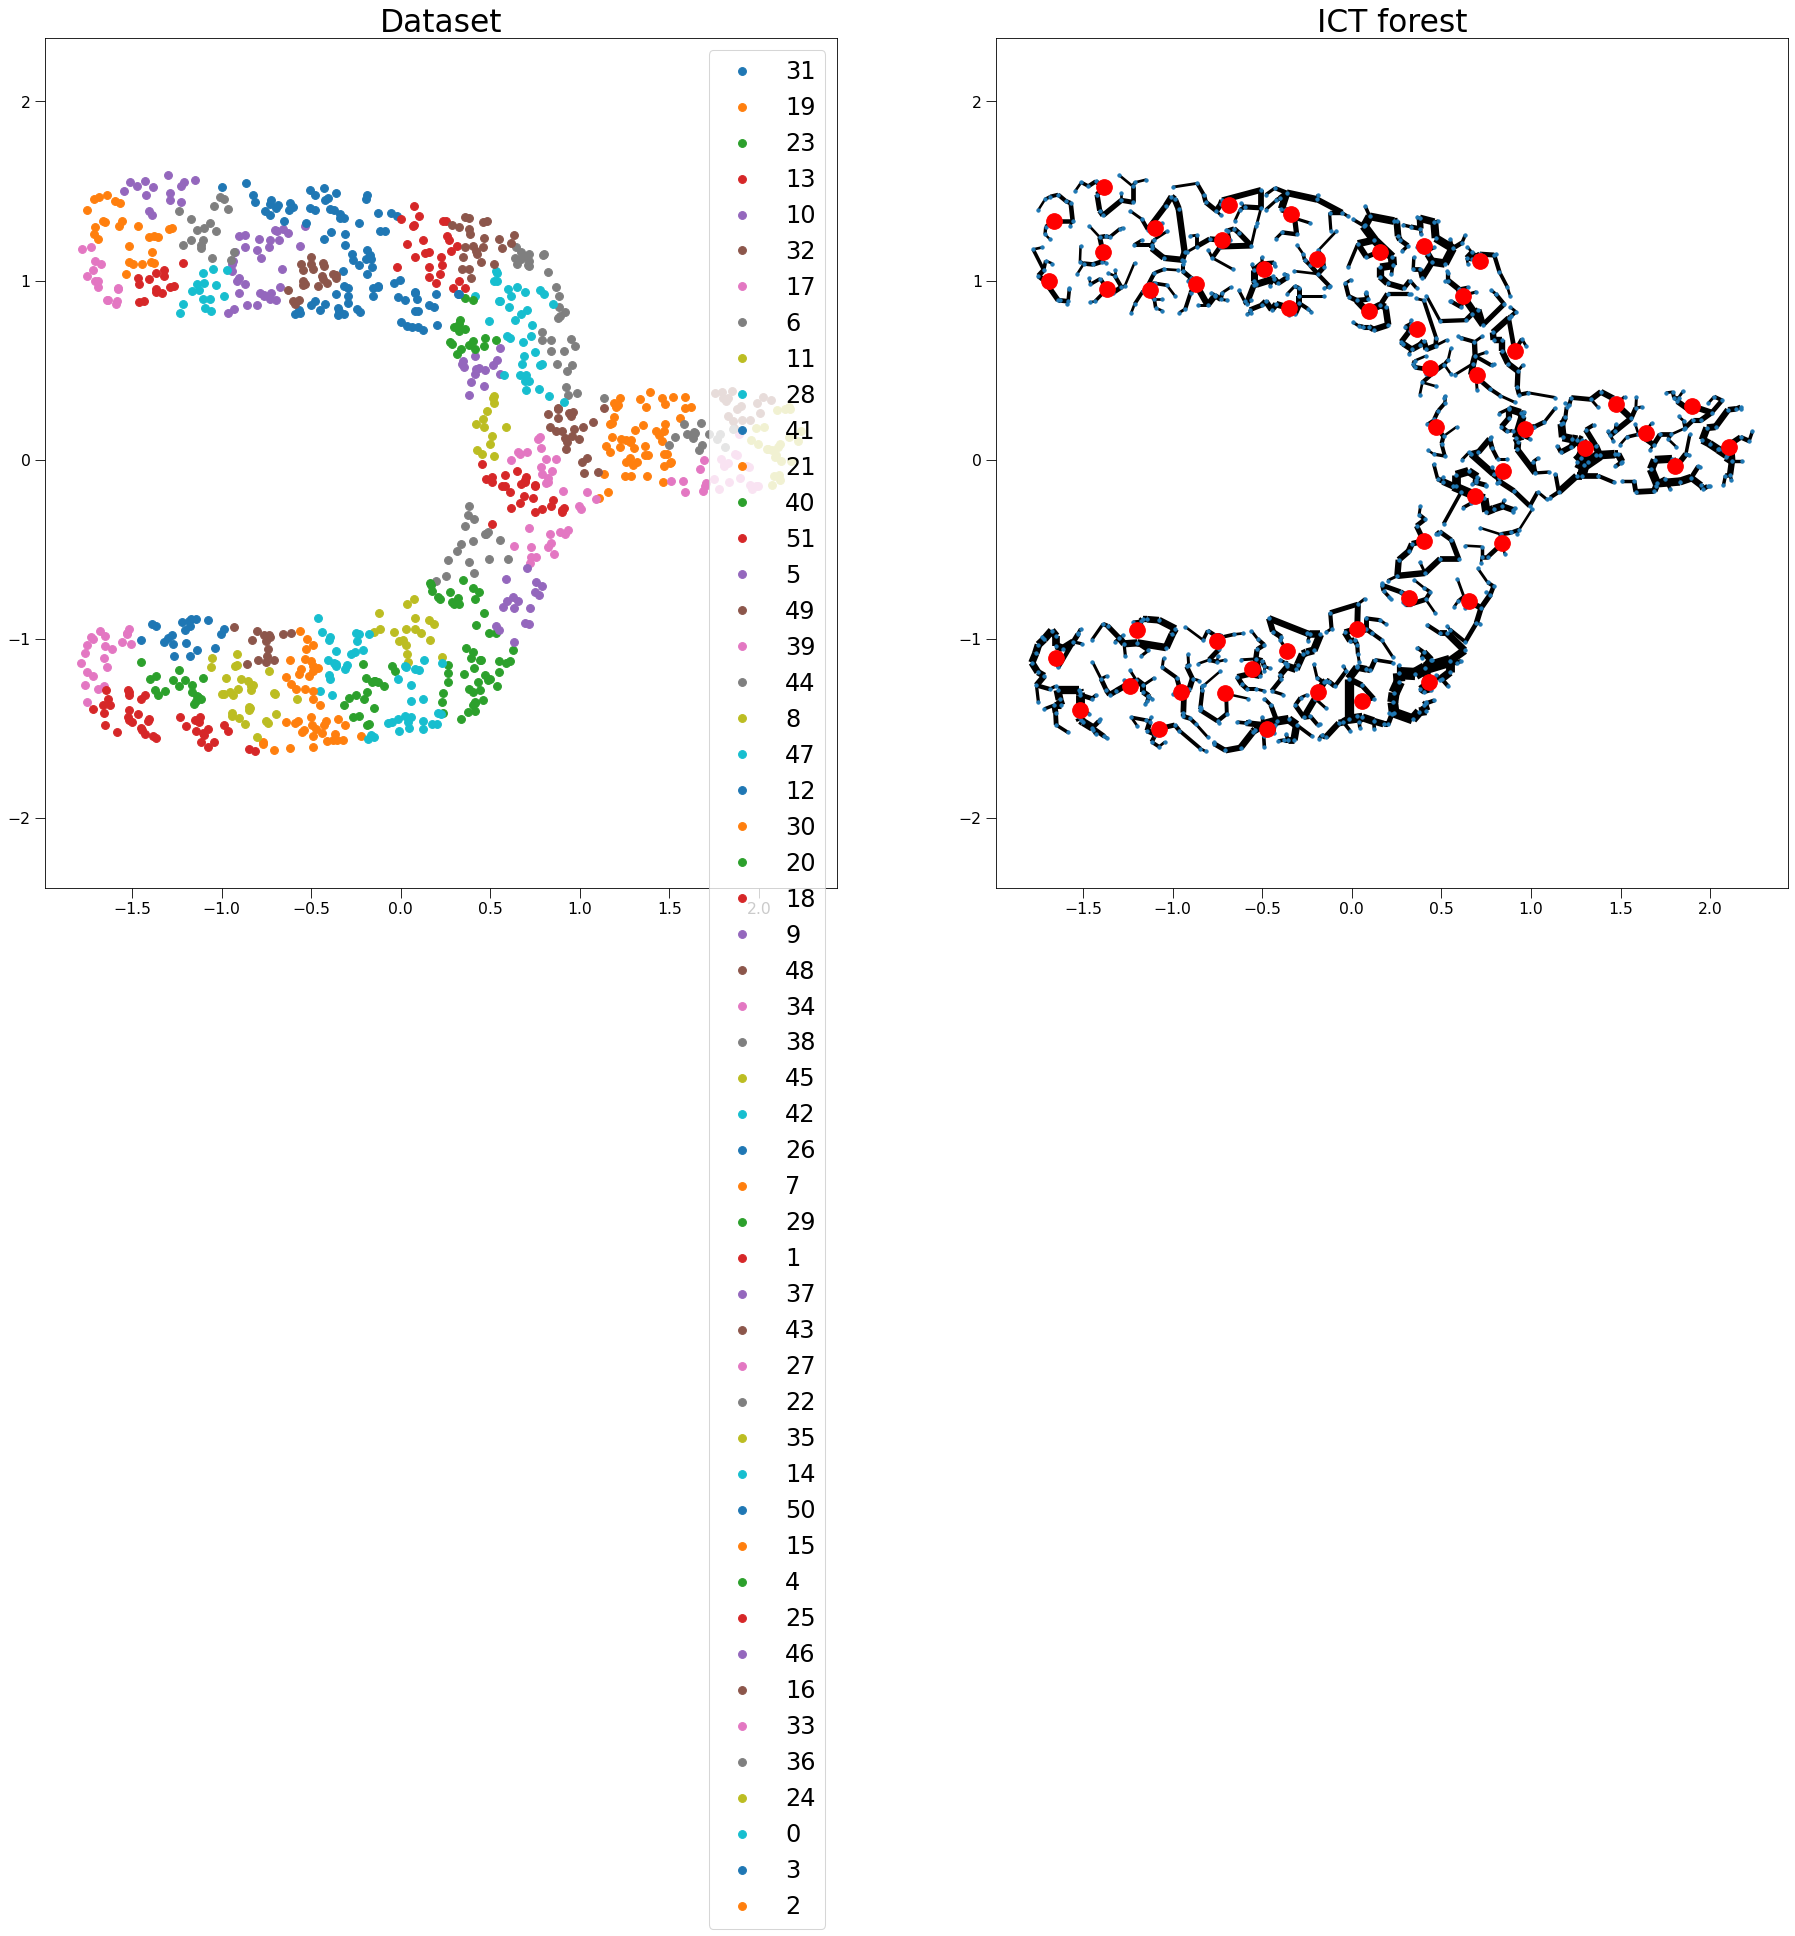

In [8]:
# Plot the prepared data
fig, axs = plt.subplots(1, 2)
plot_points(position, "Dataset", axs[0], labels=np.array(cluster_labels))
plot_graph(ICT_forest, position, "ICT forest", axs[1], cluster_centers)
plt.show()

In [9]:
G = patch_together(ICT_forest, position, bridges=4)

ICT = calculate_ICT(G, algorithm_type=ICT_algorithm, cluster_centers=cluster_centers,
                                zeros_stay_zeros=True, update_G=1.1)
ICT.indexEdges()

Patching the components together:   0%|          | 0/52 [00:00<?, ?it/s]

create edgeId array:   0%|          | 0/1079 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/1079 [00:00<?, ?it/s]

Iteration over all nodes:   0%|          | 0/999 [00:00<?, ?it/s]

update Arr 1079 -> 1008
added 263 edges early
update Arr 1008 -> 1008
update Arr 1008 -> 1008
update Arr 1008 -> 1008
update Arr 1008 -> 1008
update Arr 1008 -> 1008
update Arr 1008 -> 1008
update Arr 1008 -> 1008
update Arr 1008 -> 1008
update Arr 1008 -> 1008
update Arr 1008 -> 1007
update Arr 1007 -> 1007
update Arr 1007 -> 1007
update Arr 1007 -> 1007
update Arr 1007 -> 1007
update Arr 1007 -> 1006
added 2 edges early
update Arr 1006 -> 1006
update Arr 1006 -> 1006
update Arr 1006 -> 1005
update Arr 1005 -> 1005
update Arr 1005 -> 1002
added 5 edges early
update Arr 1002 -> 1002
update Arr 1002 -> 1002
update Arr 1002 -> 1002
update Arr 1002 -> 1002
update Arr 1002 -> 1002
update Arr 1002 -> 1002
update Arr 1002 -> 1001
update Arr 1001 -> 999
added 3 edges early
added 338 edges early


In [11]:
max_st = nk.graph.RandomMaximumSpanningForest(G)
max_st.run()
max_st = max_st.getMSF(True)
max_st.indexEdges()
G_inv = nk.graph.Graph(n=G.numberOfNodes(), weighted=True)
for u,v,w in G.iterEdgesWeights():
    G_inv.addEdge(u,v,1/w)

min_st = nk.graph.RandomMaximumSpanningForest(G_inv)
min_st.run()
min_st = min_st.getMSF(True)
min_st.indexEdges()

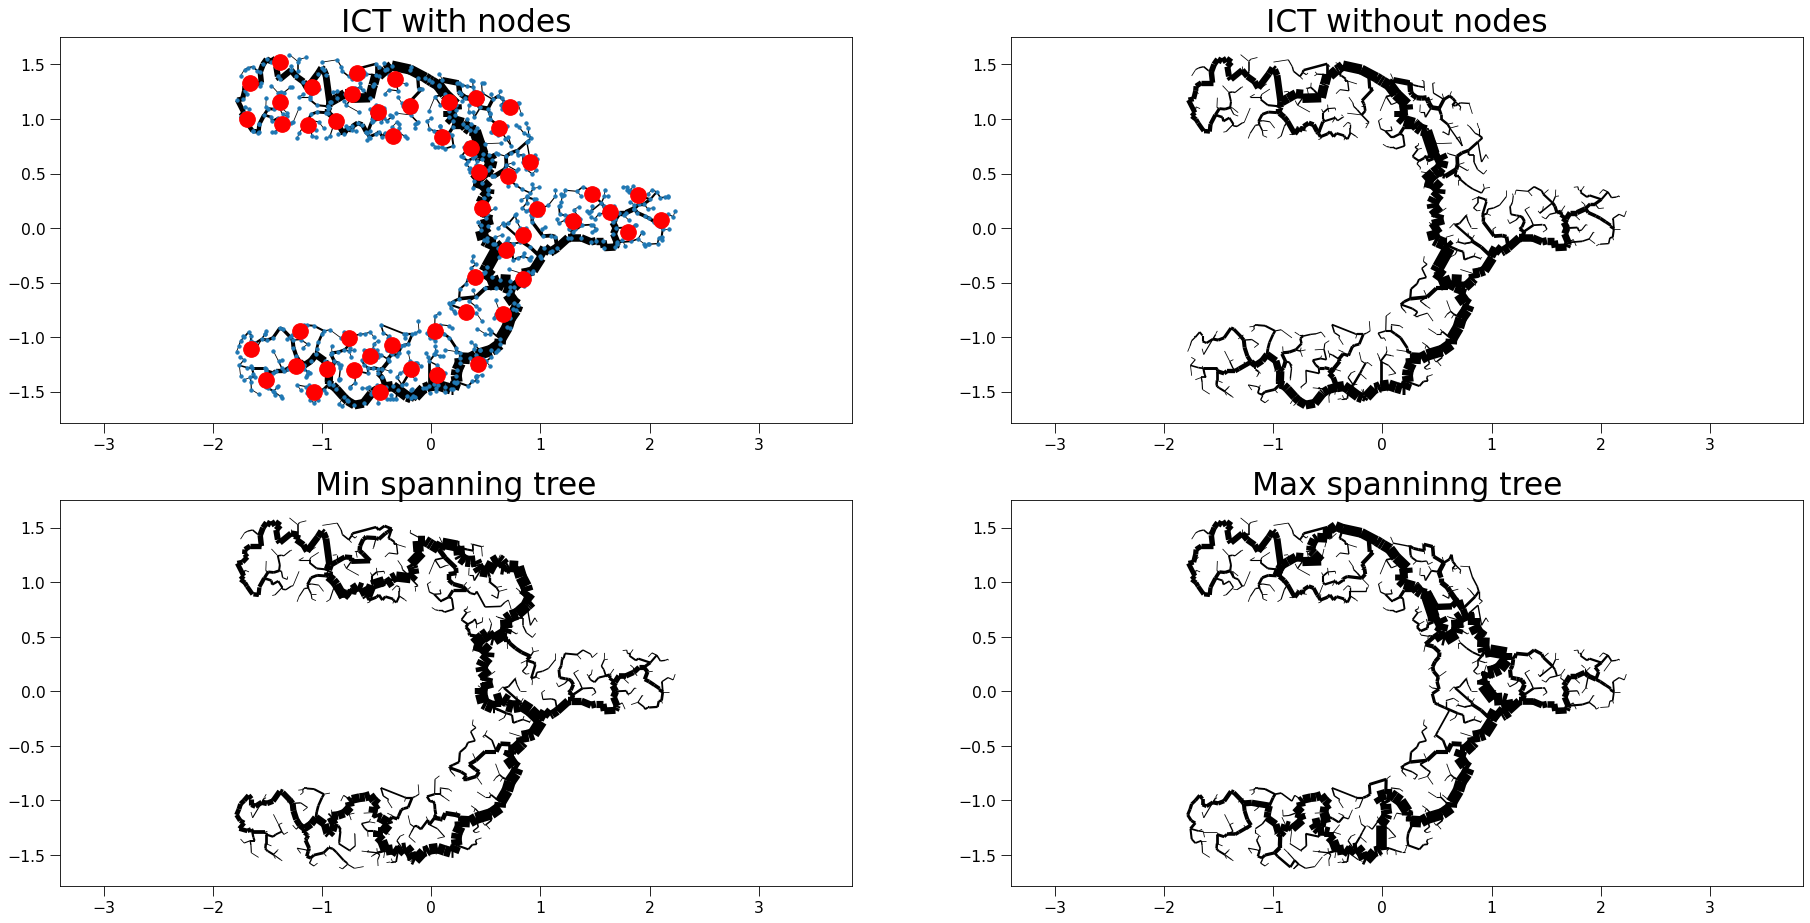

In [12]:
# Plot the ICT
fig, axs = plt.subplots(2, 2)
plot_graph(ICT, position, "ICT with nodes", axs[0,0], cluster_centers)
plot_graph(ICT, position, "ICT without nodes", axs[0,1], node_size=0)
plot_graph(max_st, position, "Max spanninng tree", axs[1,1], node_size=0)
plot_graph(min_st, position, "Min spanning tree", axs[1,0], node_size=0)
# plt.savefig(dataset+"-"+parameters+".png")